In this exploration notebook, we shall try to uncover the basic information about the dataset which will help us build our models / features.

Let us start with importing the necessary modules.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
# pd.set_option('display.max_columns', 500)

First let us import the train file and get some idea about the data.

In [2]:
train_df = pd.read_csv("../input/train.csv")
train_df.shape

(30471, 292)

In [3]:
pd.options.display.max_columns = 30
train_df.head()


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,...,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,...,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,...,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,...,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,...,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,...,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


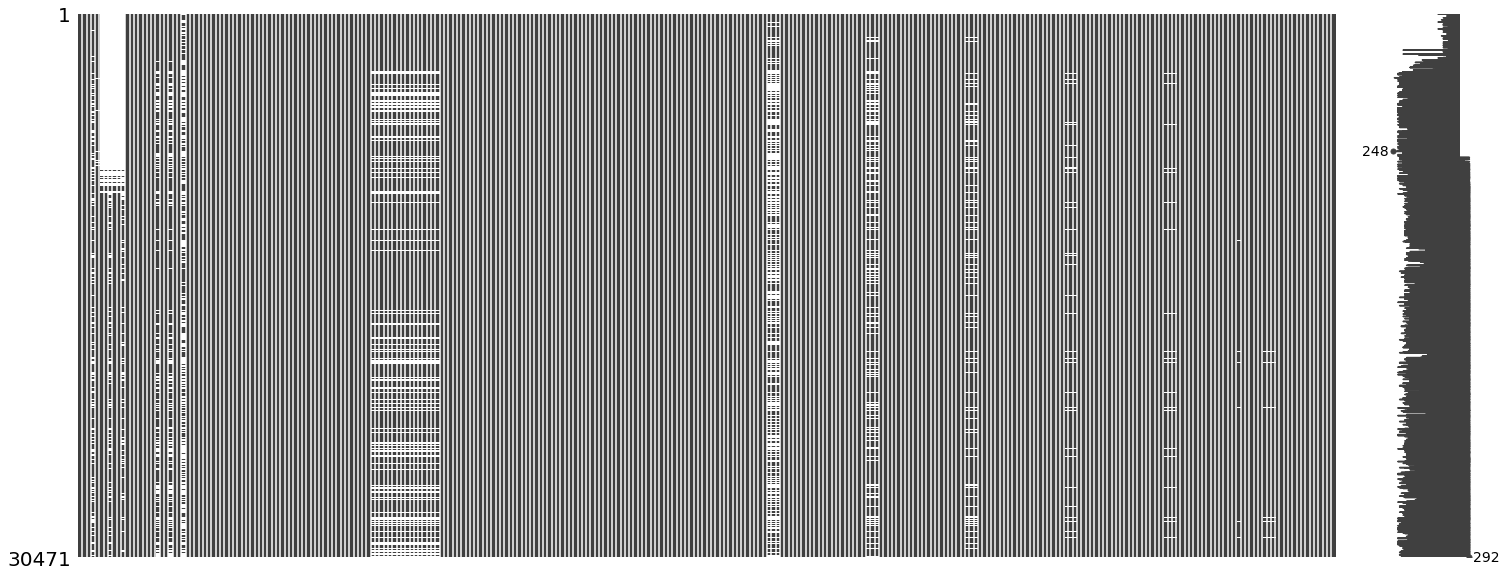

In [4]:
import missingno as msno
msno.matrix(train_df)

In [5]:
# train_df['price_doc'] / train_df['full_sq']
flt = train_df[train_df['full_sq'] != 0 ]
flt['price2sq'] = flt['price_doc'] / flt['full_sq']



In [6]:
div = 10000
(((flt['price2sq'] / div).astype(int))*div).value_counts()
high_price = 190000       

In [7]:
flt['color'] ='b'
flt.loc[flt['price2sq'] > high_price,'color'] = 'r'

In [8]:
corr_val = train_df.corr()['price_doc']
ordered_indecis = np.abs(corr_val).sort_values(ascending =False).index

In [9]:
corr_val[ordered_indecis]
#corr_val

price_doc                      1.000000
num_room                       0.476337
full_sq                        0.341840
sport_count_5000               0.294864
sport_count_3000               0.290651
trc_count_5000                 0.289371
zd_vokzaly_avto_km            -0.284069
sadovoe_km                    -0.283622
kremlin_km                    -0.279249
bulvar_ring_km                -0.279158
sport_count_2000               0.278056
ttk_km                        -0.272620
office_sqm_5000                0.269977
trc_sqm_5000                   0.268072
sport_count_1500               0.258376
nuclear_reactor_km            -0.257946
sport_objects_raion            0.252794
trc_count_3000                 0.242068
cafe_count_5000_price_1000     0.240464
stadium_km                    -0.236924
cafe_count_5000_price_1500     0.232612
cafe_count_5000                0.231546
cafe_count_5000_na_price       0.230055
cafe_count_5000_price_500      0.226952
office_sqm_3000                0.226780


In [10]:
high_corr_col = corr_val[np.abs(corr_val) >0.28].index
high_corr_col

Index([u'full_sq', u'num_room', u'sadovoe_km', u'zd_vokzaly_avto_km',
       u'sport_count_3000', u'trc_count_5000', u'sport_count_5000',
       u'price_doc'],
      dtype='object')

In [11]:
list(high_corr_col)+['material']

['full_sq',
 'num_room',
 'sadovoe_km',
 'zd_vokzaly_avto_km',
 'sport_count_3000',
 'trc_count_5000',
 'sport_count_5000',
 'price_doc',
 'material']

In [12]:
df_no_na = train_df[list(high_corr_col)+['material']].dropna()

In [13]:
print len(train_df[high_corr_col].dropna())
print len(train_df[high_corr_col])

20899
30471


In [14]:
#g = sns.PairGrid([list(high_corr_col)+['color']].dropna(),hue='color')
# g = g.map(plt.scatter)
g = sns.PairGrid(train_df[])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

SyntaxError: invalid syntax (<ipython-input-14-81a271775623>, line 3)

In [ ]:
# corr_val[]
# corr_val[]
np.abs(corr_val) > 0.25

In [ ]:
df_no_na = train_df[list(high_corr_col)+['material']].dropna()
df_no_na.reset_index(inplace=True)

In [ ]:
train_df.price_doc.describe()

In [ ]:
print ("Skew is:", train_df.price_doc.skew())
plt.hist(train_df.price_doc, color='blue')
plt.show()

In [ ]:
target = np.log(train_df.price_doc)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [ ]:
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.dtypes

corr = numeric_features.corr()

print (corr['price_doc'].sort_values(ascending=False)[:5], '\n')
print (corr['price_doc'].sort_values(ascending=False)[-5:])

In [ ]:
div = 30
(((df_no_na['full_sq']/div).astype(int))*div).value_counts()

In [ ]:
df_no_na[df_no_na['full_sq'] >= 120]['full_sq'] = 120 
df_no_na['full_sq']

In [ ]:
df_no_na.loc[df_no_na['full_sq'] >= 120,'full_sq'] = 120
df_no_na['full_sq']

In [ ]:
df_no_na[df_no_na['num_room'] >=6]['num_room'] = 6
print df_no_na['num_room'].value_counts()
df_no_na.loc[df_no_na['num_room'] >=6,'num_room'] = 6
print df_no_na['num_room'].value_counts()

In [ ]:
print len(train_df[high_corr_col].dropna())
print len(train_df[high_corr_col])

In [ ]:
df_no_na

In [ ]:
g = sns.PairGrid(df_no_na)
g = g.map(plt.scatter)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)


In [ ]:
g = sns.PairGrid(df_no_na,hue='material')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)


In [15]:

# train_df.plot(x='nuclear_reactor_km',y='price_doc',kind='scatter')

# np.sort()
y = np.sort(train_df['price_doc'].values)
x = range(0,train_df.shape[0])
print y[:5]
print x[:5]

[100000 190000 200000 260000 300000]
[0, 1, 2, 3, 4]


There are quite a few variables in this dataset. 

Let us start with target variable exploration - 'price_doc'. First let us do a scatter plot to see if there are any outliers in the data.

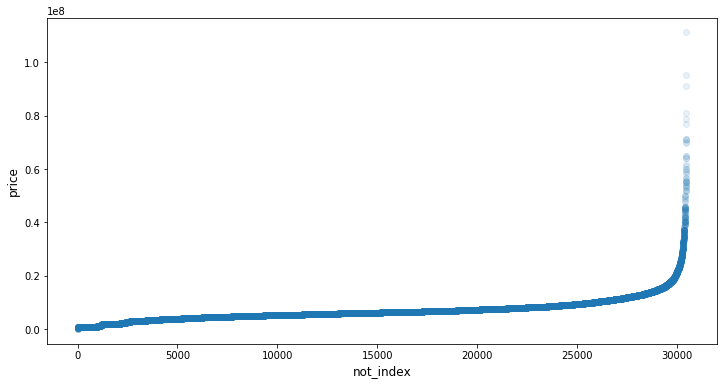

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price_doc.values),alpha=0.1)
plt.xlabel('not_index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()



Looks okay to me. Also since the metric is RMSLE, I think it is okay to have it as such. However if needed, one can truncate the high values. 

We can now bin the 'price_doc' and plot it.

In [ ]:
# plt.figure(figsize=(12,8))
# sns.distplot(.values, bins=1000, kde=True)
# plt.xlabel('price', fontsize=12)

# plt.show()
train_df[train_df['price_doc'] < 1.1*10**6]['price_doc'].value_counts() / len(train_df[train_df['price_doc'] < 1.1*10**6])

Certainly a very long right tail. Since our metric is Root Mean Square **Logarithmic** error, let us plot the log of price_doc variable.

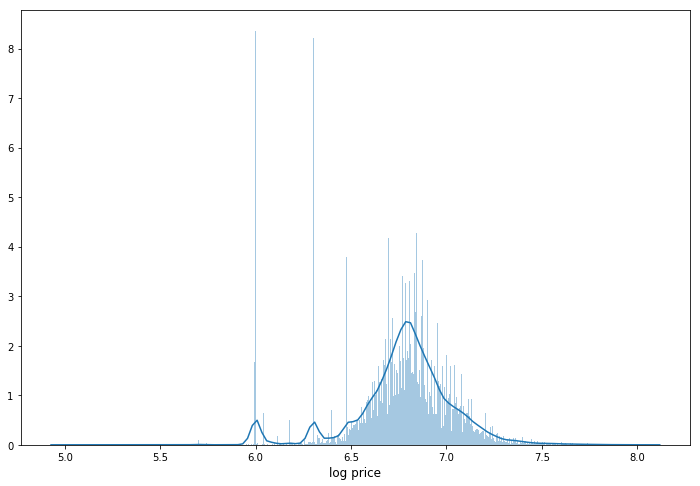

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(np.log10(train_df.price_doc.values), bins=1000, kde=True)
plt.xlabel('log price', fontsize=12)
plt.show()

In [18]:
import datetime
pd.to_datetime(train_df['timestamp'])
train_df['timestamp'].astype(datetime.datetime)
train_df['yearmonth'] = train_df['timestamp'].apply(lambda x: x[:4]+x[5:7])

This looks much better than the previous one. 

Now let us see how the median housing price change with time. 

In [ ]:

train_df['yearmonth'].str[:-2].value_counts() / train_df.shape[0]
                                                   


In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(grouped_df.yearmonth.values, grouped_df.price_doc.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

There are some variations in the median price with respect to time. Towards the end, there seems to be some linear increase in the price values.

Now let us dive into other variables and see. Let us first start with getting the count of different data types. 

In [ ]:
train_df = pd.read_csv("../input/train.csv", parse_dates=['timestamp'])
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

So majority of them are numerical variables with 15 factor variables and 1 date variable.

Let us explore the number of missing values in each column.

In [ ]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='y')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

Seems variables are found to missing as groups.

Since there are 292 variables, let us build a basic xgboost model and then explore only the important variables.

In [ ]:
for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df.price_doc.values
train_X = train_df.drop(["id", "timestamp", "price_doc"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()


So the top 5 variables and their description from the data dictionary are:

 1. full_sq - total area in square meters, including loggias, balconies and other non-residential areas
 2. life_sq - living area in square meters, excluding loggias, balconies and other non-residential areas
 3. floor - for apartments, floor of the building
 4. max_floor - number of floors in the building
 5. build_year - year built

Now let us see how these important variables are distributed with respect to target variable.

**Total area in square meters:**

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.ht

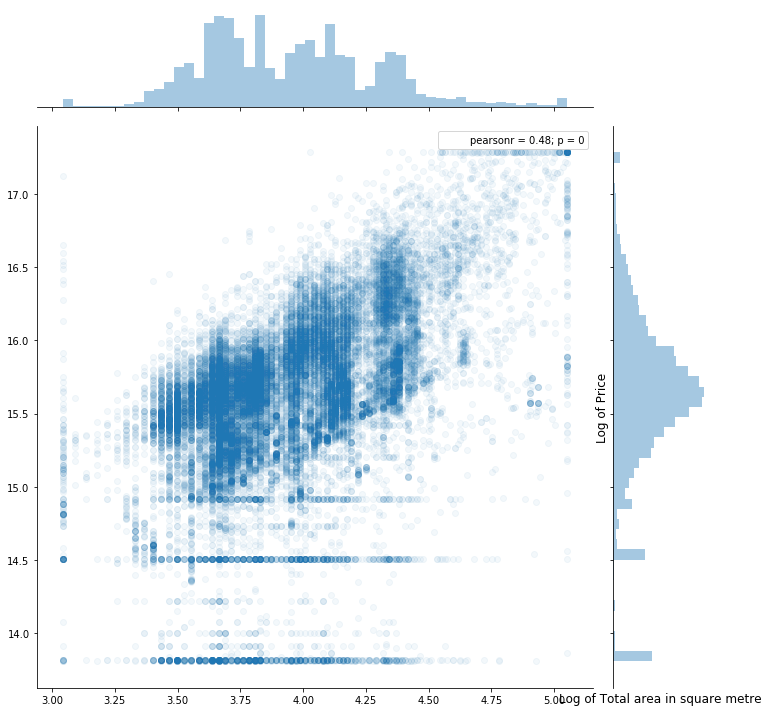

In [19]:
ulimit = np.percentile(train_df.price_doc.values, 99.5)
llimit = np.percentile(train_df.price_doc.values, 0.5)
train_df['price_doc'].ix[train_df['price_doc']>ulimit] = ulimit
train_df['price_doc'].ix[train_df['price_doc']<llimit] = llimit

col = "full_sq"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col]>ulimit] = ulimit
train_df[col].ix[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(train_df.full_sq.values), y=np.log1p(train_df.price_doc.values),alpha=0.05, size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of Total area in square metre', fontsize=12)
plt.show()

**Living area in square meters:**

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


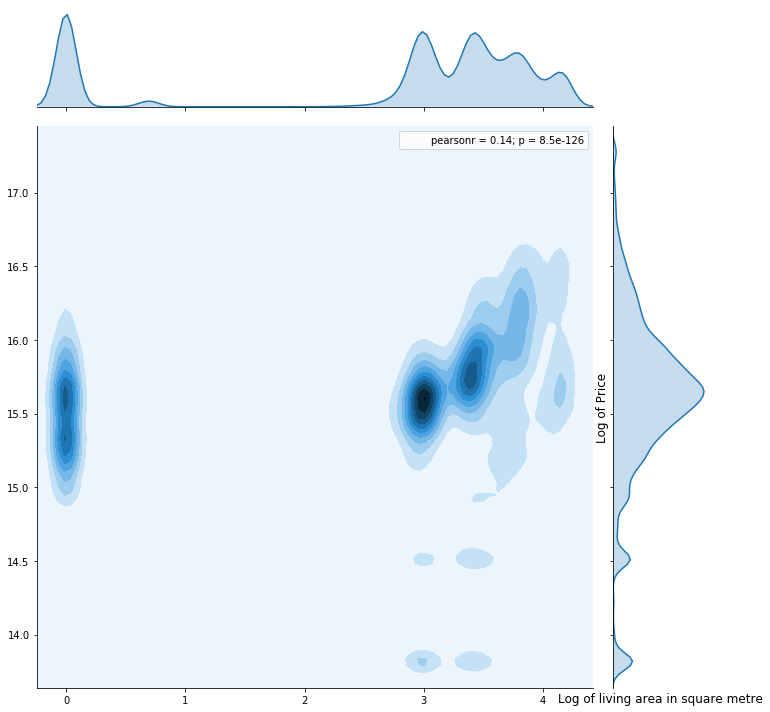

In [20]:
col = "life_sq"
train_df[col].fillna(0, inplace=True)
ulimit = np.percentile(train_df[col].values, 95)
llimit = np.percentile(train_df[col].values, 5)
train_df[col].ix[train_df[col]>ulimit] = ulimit
train_df[col].ix[train_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(train_df.life_sq.values), y=np.log1p(train_df.price_doc.values), 
              kind='kde', size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of living area in square metre', fontsize=12)
plt.show()

**Floor:**

We will see the count plot of floor variable.

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="floor", data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The distribution is right skewed. There are some good drops in between (5 to 6, 9 to 10, 12 to 13, 17 to 18). Now let us see how the price changes with respect to floors.

In [ ]:
grouped_df = train_df.groupby('floor')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.floor.values, grouped_df.price_doc.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

This shows an overall increasing trend (individual houses seems to be costlier as well - check price of 0 floor houses). 
A sudden increase in the house price is also observed at floor 18.

**Max floor:**

Total number of floors in the building is one another important variable. So let us plot that one and see.

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="max_floor", data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Max floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

We could see that there are few tall bars in between (at 5,9,12,17 - similar to drop in floors in the previous graph). May be there are some norms / restrictions on the number of maximum floors present(?). 

Now let us see how the median prices vary with the max floors. 

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="max_floor", y="price_doc", data=train_df)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Max Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

More to come. Stay tuned.!